In [1]:
import numpy as np
import tensorflow as tf
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
import keras
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input
from keras import Model, layers
from keras.models import load_model, model_from_json

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
CHANNELS=3

train_datagen = ImageDataGenerator(
    shear_range=10,
    zoom_range=0.2,
    horizontal_flip=True,
    preprocessing_function=preprocess_input)

train_generator = train_datagen.flow_from_directory(
    '/content/drive/MyDrive/Brain Tumar Data set/Dataset/New folder (2)/Train',
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))

validation_datagen = ImageDataGenerator(
    preprocessing_function=preprocess_input)

validation_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Brain Tumar Data set/Dataset/New folder (2)/Validation',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))
test_generator = validation_datagen.flow_from_directory(
   '/content/drive/MyDrive/Brain Tumar Data set/Dataset/New folder (2)/Test',
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

Found 2180 images belonging to 3 classes.
Found 306 images belonging to 3 classes.
Found 629 images belonging to 3 classes.


In [4]:
x,y=test_generator.next()
x.shape

(32, 224, 224, 3)

In [5]:
conv_base = ResNet50(
    include_top=False,
    weights='imagenet')

for layer in conv_base.layers:
    layer.trainable = False

94765736/94765736 [==============================] - 3s 0us/step


In [6]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 
predictions = layers.Dense(3, activation='softmax')(x)
model = Model(conv_base.input, predictions)

In [7]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.CategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)
history = model.fit(
    train_generator,
    batch_size=32,
    validation_data=test_generator,
    epochs=10
)

Epoch 1/10
69/69 [==============================] - 1449s 21s/step - loss: 0.5239 - accuracy: 0.8018 - val_loss: 0.4902 - val_accuracy: 0.8060
Epoch 2/10
69/69 [==============================] - 508s 7s/step - loss: 0.2938 - accuracy: 0.8876 - val_loss: 0.6861 - val_accuracy: 0.7472
Epoch 3/10
69/69 [==============================] - 512s 7s/step - loss: 0.2353 - accuracy: 0.9165 - val_loss: 0.4717 - val_accuracy: 0.8203
Epoch 4/10
69/69 [==============================] - 506s 7s/step - loss: 0.2441 - accuracy: 0.9115 - val_loss: 0.5790 - val_accuracy: 0.7854
Epoch 5/10
69/69 [==============================] - 505s 7s/step - loss: 0.2117 - accuracy: 0.9193 - val_loss: 0.4345 - val_accuracy: 0.8156
Epoch 6/10
69/69 [==============================] - 502s 7s/step - loss: 0.2057 - accuracy: 0.9252 - val_loss: 0.5601 - val_accuracy: 0.7901
Epoch 7/10
69/69 [==============================] - 500s 7s/step - loss: 0.1482 - accuracy: 0.9390 - val_loss: 0.4599 - val_accuracy: 0.8092
Epoch 8/10


In [8]:
loss, accuracy = model.evaluate(test_generator )

# Print the accuracy
print("Accuracy: " + str(accuracy))
# Print the loss
print("Loss: " + str(loss))

20/20 [==============================] - 108s 5s/step - loss: 0.5600 - accuracy: 0.8076
Accuracy: 0.8076311349868774
Loss: 0.560039758682251


In [9]:
test_generator.class_indices

{'glioma': 0, 'meningioma': 1, 'pituitary_tumor': 2}

In [10]:
import numpy as np
from sklearn import metrics

predictions = model.predict_generator(test_generator)
predicted_classes = np.argmax(predictions, axis = 1)
true_classes = test_generator.classes
class_labels = ['glioma','meningioma', 'pituitary_tumor']
report = metrics.classification_report(true_classes, predicted_classes, target_names = class_labels)
print(report)

<ipython-input-10-80215e19ee1d>:4: UserWarning: `Model.predict_generator` is deprecated and will be removed in a future version. Please use `Model.predict`, which supports generators.
  predictions = model.predict_generator(test_generator)


                 precision    recall  f1-score   support

         glioma       0.97      0.71      0.82       291
     meningioma       0.63      0.77      0.69       152
pituitary_tumor       0.80      0.98      0.88       186

       accuracy                           0.81       629
      macro avg       0.80      0.82      0.80       629
   weighted avg       0.84      0.81      0.81       629



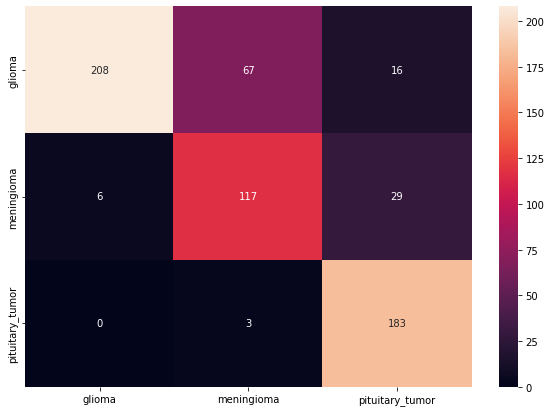

In [11]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt


cm = metrics.confusion_matrix(true_classes, predicted_classes)
df_cm = pd.DataFrame(cm, index = [i for i in ['glioma','meningioma', 'pituitary_tumor']],
                  columns = [i for i in ['glioma','meningioma', 'pituitary_tumor']])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True, fmt='d')

In [12]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

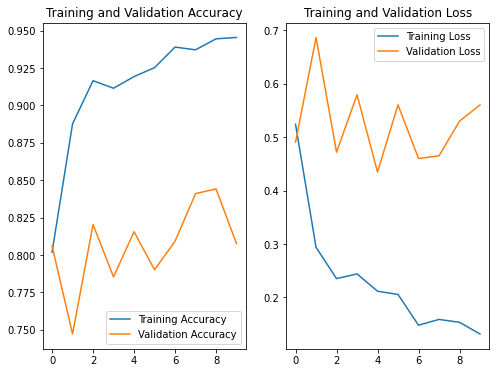

In [13]:
EPOCHS=10
plt.figure(figsize=(8, 6))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

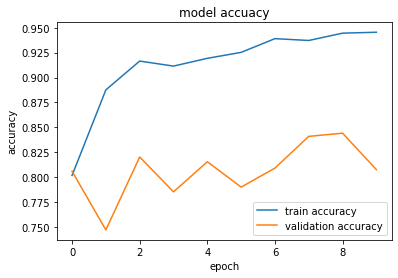

In [14]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("model accuacy")
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train accuracy', 'validation accuracy'], loc='lower right')
plt.show()

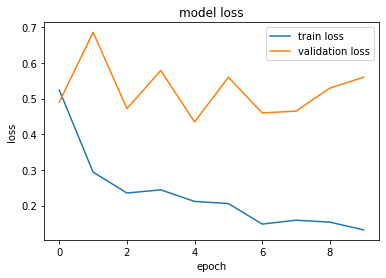

In [15]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train loss', 'validation loss'], loc='upper right')
plt.show()